In [1]:
import pandas as pd
import numpy as np
import scipy
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
bigdf = pd.read_csv('D:/Prog/ML/Large dataset/interesting data sets/MMD_DS_test.csv')

In [3]:
bigdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984477 entries, 0 to 984476
Data columns (total 2 columns):
CDR_TEXT    984476 non-null object
labels      984477 non-null object
dtypes: object(2)
memory usage: 15.0+ MB


In [4]:
bigdf.head(10)

,CDR_TEXT,labels
0,FELIZ ANIVERSARIO TAIANE!Agende o seu retorno ...,spam
1,Your iROKOtv verification code is 2920,spam
2,Enjoy two epic offers at asc-ply.com/AS: A 100...,spam
3,olsun dileklerimizle. ANADOLU SİGORTA https:/...,spam
4,85254 is Your Yahoo Account Key,spam
5,Danny We have you Approved. Please call us imm...,spam
6,Cash payout of MK 2330000 from account: 263851...,spam
7,.لما تروح ركب دولاب شهد واغسل باقى البسطاتات م...,spam
8,<#> ‏55008‏ هو رمز فيسبوك الخاص بك Laz+nxCarLW,spam
9,Unsubscribe: https://ig.me/w/1Ks06aa5zchffKn,spam


In [6]:
def standardize_text(df):
    df = df.str.replace('\s+', ' ')
    df = df.str.replace('\.+', '.')
    df = df.str.replace(r"http\S+", "URL")
    df = df.str.replace(r"http", "")
    df = df.str.replace(r"@\S+", "")
    special_char_list = [':', ';', '?', '}', ')', '{', '(', '!', ',', "'"]
    for special_char in special_char_list:
        df=df.str.replace(special_char, '')
    df = df.str.replace(r"@", "at")
    df = df.str.lower()
    return df

bigdf['CDR_TEXT'] = standardize_text(bigdf['CDR_TEXT'])
bigdf = bigdf.dropna()
bigdf.head(50)

,CDR_TEXT,labels
0,feliz aniversario taianeagende o seu retorno n...,spam
1,your irokotv verification code is 2920,spam
2,enjoy two epic offers at asc-ply.com/as a 100%...,spam
3,olsun dileklerimizle. anadolu si̇gorta url,spam
4,85254 is your yahoo account key,spam
5,danny we have you approved. please call us imm...,spam
6,cash payout of mk 2330000 from account 2638519...,spam
7,.لما تروح ركب دولاب شهد واغسل باقى البسطاتات م...,spam
8,<#> ‏55008‏ هو رمز فيسبوك الخاص بك laz+nxcarlw,spam
9,unsubscribe url,spam


In [7]:
bigdf['labels'] = bigdf['labels'].map({'spam':0,'normal':1})
bigdf.head()

,CDR_TEXT,labels
0,feliz aniversario taianeagende o seu retorno n...,0
1,your irokotv verification code is 2920,0
2,enjoy two epic offers at asc-ply.com/as a 100%...,0
3,olsun dileklerimizle. anadolu si̇gorta url,0
4,85254 is your yahoo account key,0


In [8]:
bigdf.groupby("labels").count()

,CDR_TEXT
labels,
0,89939
1,894537


In [9]:
bigdf["tokens"] = bigdf["CDR_TEXT"].apply(nltk.tokenize.word_tokenize)

In [10]:
all_words = [word for tokens in bigdf["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in bigdf["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

18603610 words total, with a vocabulary size of 244210
Max sentence length is 63


In [11]:
import matplotlib.pyplot as plt

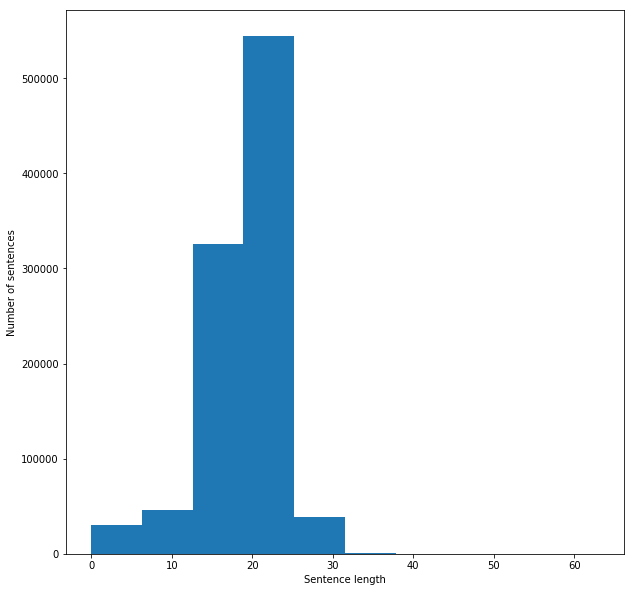

In [12]:
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [32]:
bigdf['len_sent'] = pd.Series(sentence_lengths)
bigdf = bigdf.dropna()

In [14]:
import seaborn as sns

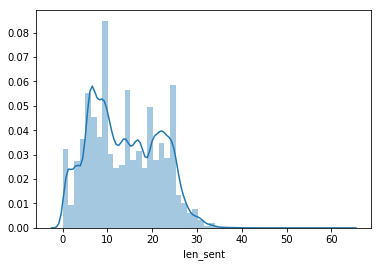

In [15]:
sns.distplot(bigdf[bigdf['labels'] == 0]['len_sent'])

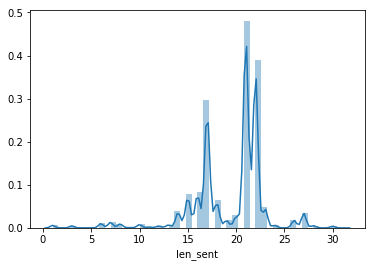

In [16]:
sns.distplot(bigdf[(bigdf['len_sent'] < 35) & (bigdf['labels'] == 1)]['len_sent'])

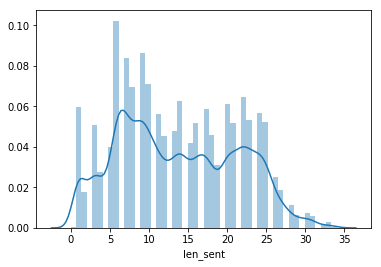

In [17]:
sns.distplot(bigdf[(bigdf['len_sent'] < 35) & (bigdf['labels'] == 0)]['len_sent'])

In [18]:
len(bigdf[(bigdf['len_sent'] > 30) & (bigdf['labels'] == 1)]['len_sent'])

9

In [19]:
len(bigdf[(bigdf['len_sent'] > 30) & (bigdf['labels'] == 0)]['len_sent'])

729

In [20]:
len(bigdf[(bigdf['len_sent'] < 1) & (bigdf['labels'] == 0)]['len_sent'])

23

In [21]:
len(bigdf[(bigdf['len_sent'] < 1) & (bigdf['labels'] == 1)]['len_sent'])

0

In [31]:
bigdf.head(2)

,CDR_TEXT,labels,tokens,len_sent
0,feliz aniversario taianeagende o seu retorno n...,0,"[feliz, aniversario, taianeagende, o, seu, ret...",20.0
1,your irokotv verification code is 2920,0,"[your, irokotv, verification, code, is, 2920]",6.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = bigdf['CDR_TEXT'].tolist()
list_labels = bigdf['labels'].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=79)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [24]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

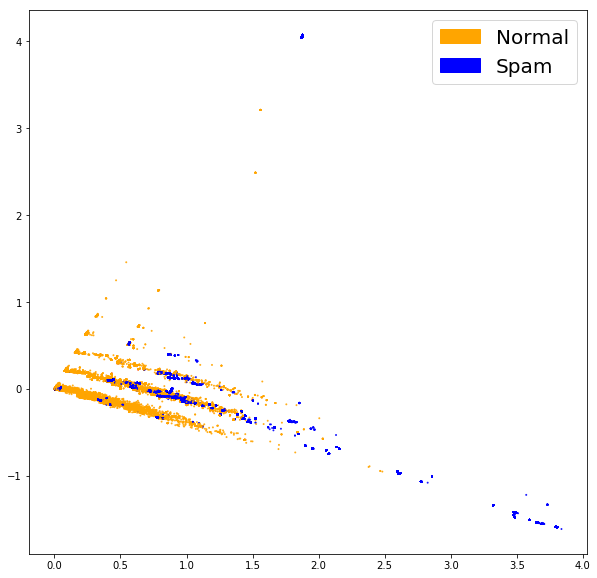

In [34]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    colors = ['orange','blue']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=1, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        red_patch = mpatches.Patch(color='orange', label='Normal')
        green_patch = mpatches.Patch(color='blue', label='Spam')
        plt.legend(handles=[red_patch, green_patch], prop={'size': 20})

fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30, n_jobs=-1, random_state=79)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

D:\Prog\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.999, precision = 0.999, recall = 0.999, f1 = 0.999


In [46]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

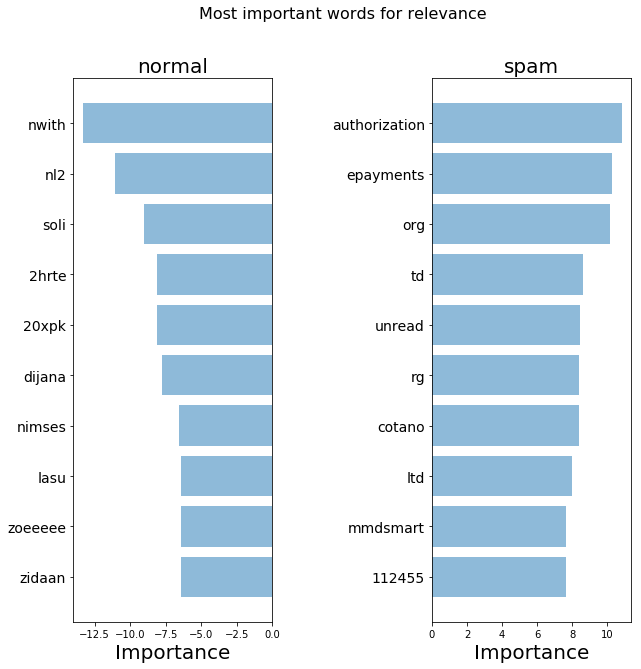

In [47]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('normal', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('spam', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [48]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

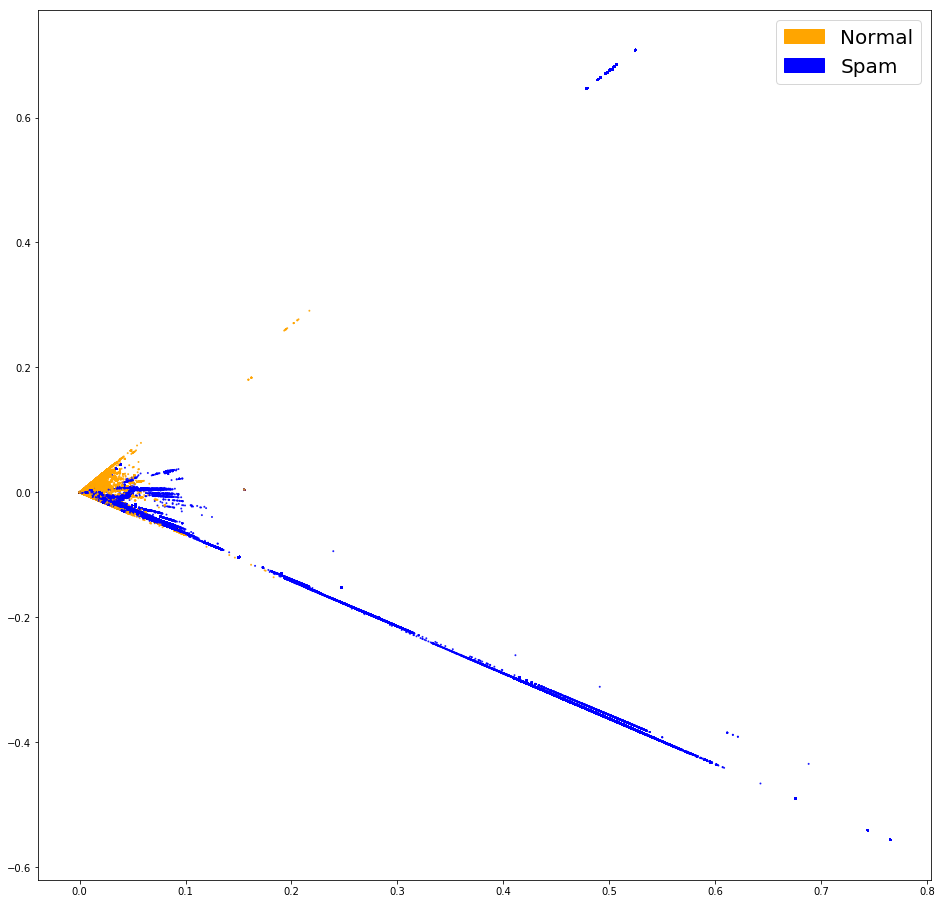

In [49]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [50]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [51]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.999, precision = 0.999, recall = 0.999, f1 = 0.999


In [52]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

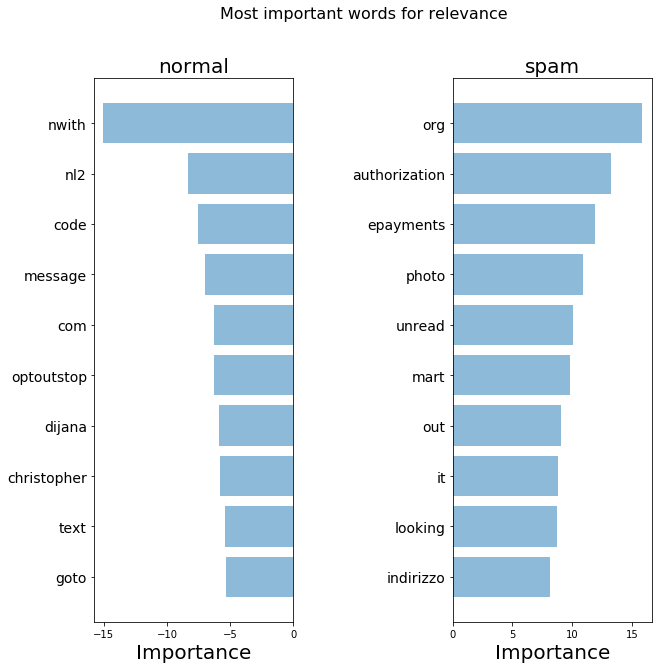

In [54]:
top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")